(300, 451, 3)


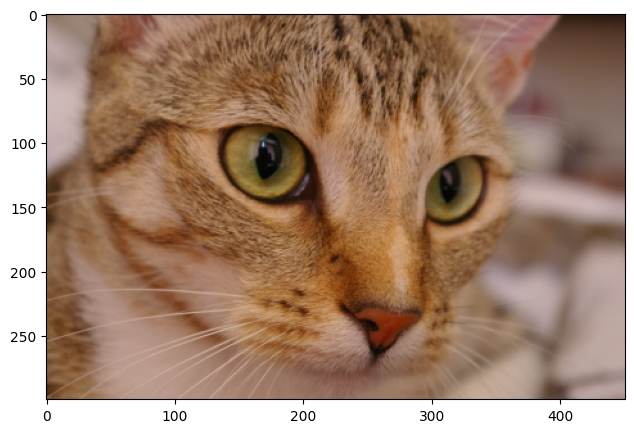

In [4]:
from skimage import data
import matplotlib.pyplot as plt

hr_cat = data.chelsea() # skimage에서 제공하는 예제 이미지를 불러오기
hr_shape = hr_cat.shape[:2]

print(hr_cat.shape) # 이미지의 크기를 출력 >> (300, 451, 3)

plt.figure(figsize=(8,5))
plt.imshow(hr_cat)

In [31]:
type(hr_cat)
hr_cat.shape

(300, 451, 3)

In [5]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**동일 이미지 비교**")
print("PSNR :", peak_signal_noise_ratio(hr_cat, hr_cat))
print("SSIM :", structural_similarity(hr_cat, hr_cat, multichannel=True))

**동일 이미지 비교**
PSNR : inf
SSIM : 1.0


C:\Users\netiy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\netiy\AppData\Local\Temp\ipykernel_4080\1892035491.py:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print("SSIM :", structural_similarity(hr_cat, hr_cat, multichannel=True))


C:\Users\netiy\AppData\Local\Temp\ipykernel_4080\2855070345.py:26: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = [round(structural_similarity(hr_cat, i, multichannel=True), 3) for i in images]


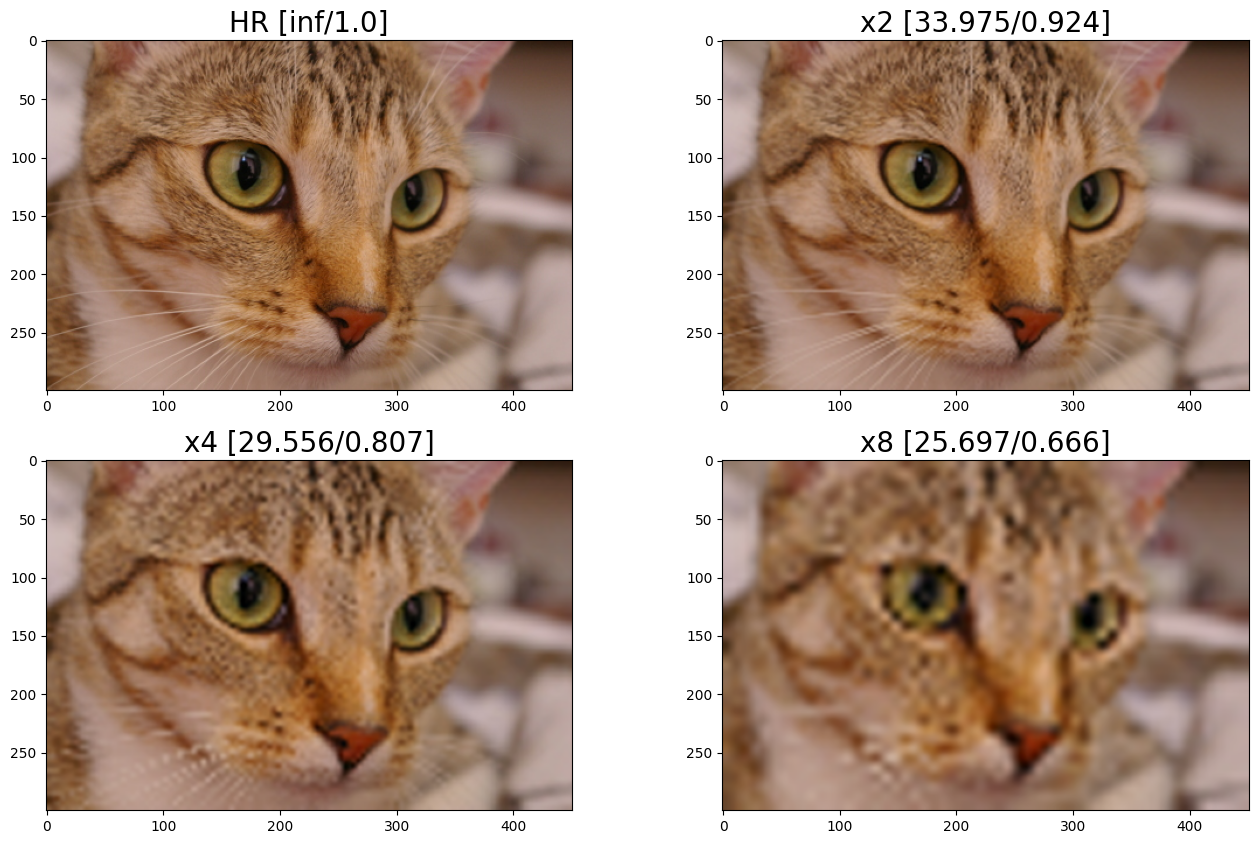

In [9]:
import cv2

# 이미지를 특정 크기로 줄이고 다시 늘리는 과정을 함수로 정의
def interpolation_xn(image, n):
    downsample = cv2.resize(
        image,
        dsize=(hr_shape[1]//n, hr_shape[0]//n)
    )
    upsample = cv2.resize(
        downsample,
        dsize=(hr_shape[1], hr_shape[0]),
        interpolation=cv2.INTER_CUBIC
    )
    return upsample

lr2_cat = interpolation_xn(hr_cat, 2) # 1/2로 줄이고 다시 복원
lr4_cat = interpolation_xn(hr_cat, 4) # 1/4로 줄이고 다시 복원
lr8_cat = interpolation_xn(hr_cat, 8) # 1/8로 줄이고 다시 복원

images = [hr_cat, lr2_cat, lr4_cat, lr8_cat]
titles = ["HR", "x2", "x4", "x8"]

# 각 이미지에 대해 PSNR을 계산하고 반올림
psnr = [round(peak_signal_noise_ratio(hr_cat, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합
ssim = [round(structural_similarity(hr_cat, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 
plt.figure(figsize=(16,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

In [23]:
import os
import numpy as np
from PIL import Image

In [16]:
os.getcwd()
os.listdir('./Save_file/0008794_rest/train_latest/images/')

lst1 = os.listdir('./Save_file/0008794_rest/train_latest/images/fake_B/')
lst2 = os.listdir('./Save_file/0008794_rest/train_latest/images/real_A/')

In [20]:
for i in range(len(lst1)):
    
    x, y = lst1[i], lst2[i]
    print(x, '\t',y)
    
    print("PSNR :", peak_signal_noise_ratio(hr_cat, hr_cat))
    print("SSIM :", structural_similarity(hr_cat, hr_cat, multichannel=True))
        

0008794_ac-001-011.png 	 0008794_ac-001-011.png
0008794_ac-001-012.png 	 0008794_ac-001-012.png
0008794_ac-001-013.png 	 0008794_ac-001-013.png
0008794_ac-001-014.png 	 0008794_ac-001-014.png
0008794_ac-001-015.png 	 0008794_ac-001-015.png
0008794_ac-001-016.png 	 0008794_ac-001-016.png
0008794_ac-001-017.png 	 0008794_ac-001-017.png
0008794_ac-001-018.png 	 0008794_ac-001-018.png
0008794_ac-001-019.png 	 0008794_ac-001-019.png
0008794_ac-001-031.png 	 0008794_ac-001-031.png
0008794_ac-001-032.png 	 0008794_ac-001-032.png
0008794_ac-001-033.png 	 0008794_ac-001-033.png
0008794_ac-001-034.png 	 0008794_ac-001-034.png
0008794_ac-001-035.png 	 0008794_ac-001-035.png
0008794_ac-001-036.png 	 0008794_ac-001-036.png
0008794_ac-001-037.png 	 0008794_ac-001-037.png
0008794_ac-001-038.png 	 0008794_ac-001-038.png
0008794_ac-001-039.png 	 0008794_ac-001-039.png


In [33]:
img1 = Image.open('./Save_file/0008794_rest/train_latest/images/fake_B/0008794_ac-001-011.png')
img2 = Image.open('./Save_file/0008794_rest/train_latest/images/real_B/0008794_ac-001-011.png')
img1_array = np.array(img1)
img2_array = np.array(img2)
# img1_array.shape, img2_array.shape

peak_signal_noise_ratio(img1_array, img2_array), structural_similarity(img1_array, img2_array)

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.